In [ ]:
using Revise, HarmonicBalance

# Natural equation for the parametron

In [13]:
@variables Ω, γ, λ, F, x, ψ, η, α, ω, t, x(t)

natural_equation =  d(d(x,t),t) + γ*d(x,t) + Ω^2*(1-λ*cos(2*ω*t+ψ))*x + α*x^3 + η*d(x,t)*x^2 + F*cos(ω*t)
dEOM = DifferentialEquation(natural_equation, x)
add_harmonic!(dEOM, x, ω);
harm_eq = get_harmonic_equations(dEOM)

fixed = (Ω => 1.0, γ => 1E-2, λ => 5E-2, F => 1E-3, α => 1., η=>0.3, ψ => 0);

## 1D parameter set: results, phase diagram

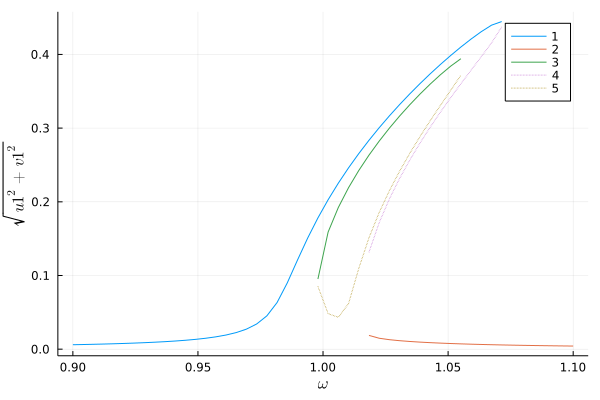

In [36]:
varied = ω => LinRange(0.9, 1.1, 50)
res_1D = get_steady_states(harm_eq, varied, fixed, random_warmup=false);

# plot stable, add unstable as dotted
p = plot(res_1D, x="ω", y="sqrt(u1^2 + v1^+2)", class="stable")
plot!(res_1D, x="ω", y="sqrt(u1^2 + v1^+2)", not_class="stable", style=:dot)

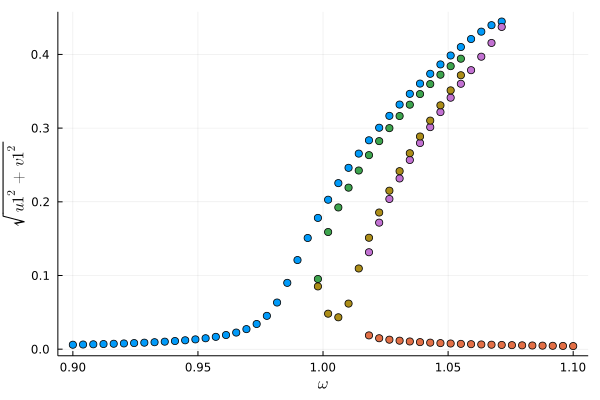

In [54]:
# show some markers instead
plot(res_1D, x="ω", y="sqrt(u1^2 + v1^+2)", markers=:true, line=false, legend=false)

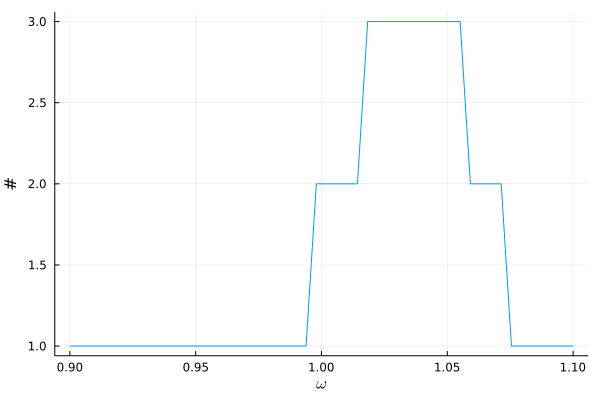

In [39]:
HarmonicBalance.plot_phase_diagram(res_1D, class="stable")

## 2D parameter set

Solving for 2500 parameters... 100%|████████████████████| Time: 0:00:01
  # parameters solved:  2500
  # paths tracked:      12500


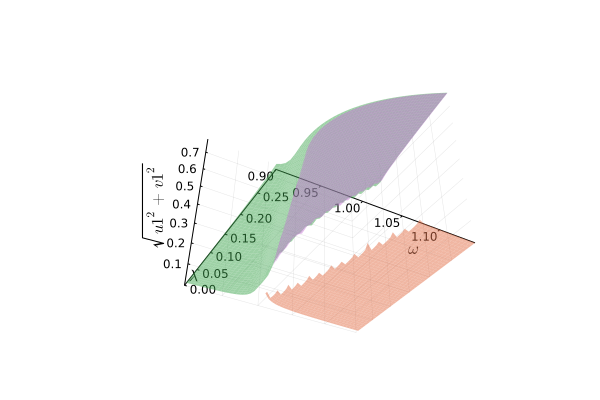

In [58]:
varied = (ω => LinRange(0.9, 1.15,50), λ => LinRange(0.0, 0.3, 50))
res_2D = get_steady_states(harm_eq, varied, fixed, random_warmup=true, sorting="none");

# add the 5 branches with different colors
p=plot(res_2D, z="sqrt(u1^2 + v1^2)", branch=1, class="stable", camera=(60,-40))
[plot!(res_2D, z="sqrt(u1^2 + v1^2)", branch=k, class="stable", c=k) for k in 2:5]
p

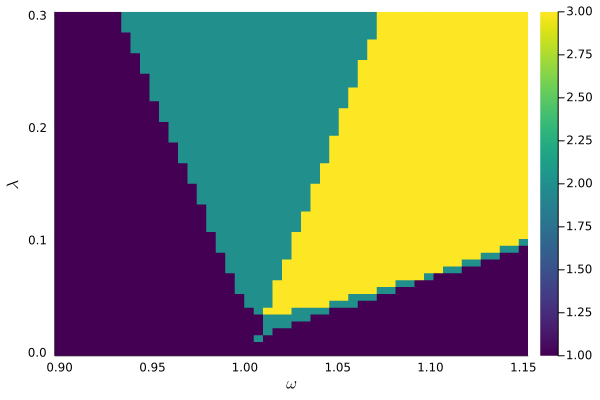

In [51]:
HarmonicBalance.plot_phase_diagram(res_2D, class="stable")

# Time-dependent solving

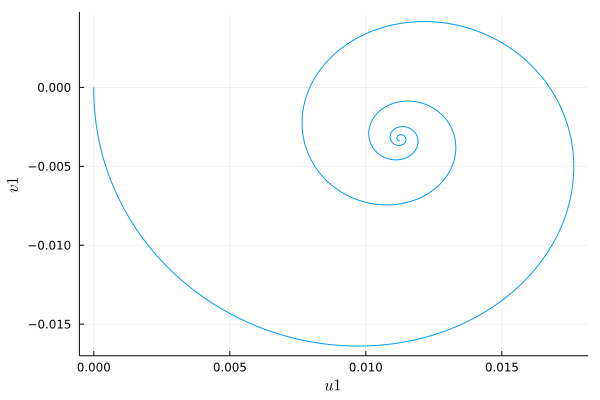

In [93]:
import HarmonicBalance.TimeEvolution: ODEProblem, DifferentialEquations.solve

x0 = [0.0, 0.0]

fixed = (Ω => 1.0,γ => 1E-2, λ => 5E-2, F => 1E-3,  α => 1., η=>0.3, θ => 0, ψ => 0, ω=>1.03)
ode_problem = ODEProblem(harmonic_eqs, fixed, x0 = x0, timespan = (0,1000));
time_evo= solve(ode_problem, saveat=1.); # saveat fixes output resolution (NOT the integration timestep)
HarmonicBalance.plot(time_evo, ["u1", "v1"], harmonic_eqs)

# Linear response spectra: WIP

In [ ]:
@time spectrum = HarmonicBalance.LinearResponse.plot_linear_response(res_1D, x, branch=1, 
    Ω_range=LinRange(0.6,1.4,300), order=1, logscale=true)

In [ ]:
#@time spectrum = HarmonicBalance.LinearResponse.plot_linear_response(soln, x, branch=1, 
#    Ω_range=LinRange(0.6,1.4,300), order=2, logscale=true)
# @time HarmonicBalance.LinearResponse.plot_response(soln, LinRange(0.7,1.3,1000), branch=1, logscale=false);